In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from source.tserie import TSerie
from source.keras_utils import getPeaxFeatures
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

2022-09-13 10:13:15.373516: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
from source.datasets import loadFuncionalModel, loadNatops, loadWafer, loadSelfRegulationSCP2, loadBasicMotions, loadEarthquakes, loadItalyPowerDemand, loadEigenWorms

dataset = 'natops' # natops | wafer | selfreg | basicmotions | earthquakes | italy | eigenworms

settings = {
    'natops' : {
        'epochs': 200,
        'filters' : [16, 32],
        'kernels' : [5, 5],
        'feat_size' : 15,
    },
    'wafer' : {
        'epochs': 50,
        'filters' : [16, 32],
        'kernels' : [5, 5],
        'feat_size' : 20,
    },
    'basicmotions' : {
        'epochs': 300,
        'filters' : [16, 32],
        'kernels' : [5, 5],
        'feat_size' : 20,
    },
    'italy' : {
        'epochs': 200,
        'filters' : [16],
        'kernels' : [5],
        'feat_size' : 20,
    }
}

if dataset == 'natops':
    X_train, y_train, X_test, y_test, classLabels = loadNatops()
elif dataset == 'wafer':
    X_train, y_train, X_test, y_test = loadWafer()
    classLabels = {}
elif dataset == 'basicmotions':
    X_train, y_train, X_test, y_test, classLabels= loadBasicMotions()
elif dataset == 'italy':
    X_train, y_train, X_test, y_test, classLabels= loadItalyPowerDemand()
# X = np.concatenate([X_train, X_test], axis=0).transpose([0, 2, 1])
# y = np.concatenate([y_train, y_test], axis=0)
# y = np.array([float(v) for v in y]).astype(int).tolist()

In [3]:
mts_train = TSerie(X=X_train.transpose([0, 2, 1]), y=y_train)
mts_test = TSerie(X=X_test.transpose([0, 2, 1]), y=y_test)

Loaded mts - N: 180, T: 51, D: 24 
Loaded mts - N: 180, T: 51, D: 24 


In [4]:
# mts.smooth(window_size=40)
# mts.shapeNormalizization()
minl, maxl = mts_train.minMaxNormalizization()
minl, maxl = mts_test.minMaxNormalizization(minl= minl, maxl=maxl)

In [5]:
mts_train.features, mts_test.features =  getPeaxFeatures(
    mts_train.X.transpose([0, 2, 1]), 
    settings[dataset]['filters'],
    settings[dataset]['kernels'],
    feat_size = settings[dataset]['feat_size'], 
    epochs =settings[dataset]['epochs'], 
    batch_size = 64, 
    X_test=mts_test.X.transpose([0, 2, 1])
)


2022-09-13 10:13:19.125539: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-13 10:13:19.126565: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-13 10:13:19.954300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 10:13:19.954683: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX450 computeCapability: 7.5
coreClock: 1.575GHz coreCount: 14 deviceMemorySize: 1.83GiB deviceMemoryBandwidth: 52.17GiB/s
2022-09-13 10:13:19.954751: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-09-13 10:13:19.972679: I tensorflow/stream_executor/platform/defaul

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 51, 1)]           0         
_________________________________________________________________
conv0 (Conv1D)               (None, 26, 16)            96        
_________________________________________________________________
conv1 (Conv1D)               (None, 13, 32)            2592      
_________________________________________________________________
flatten (Flatten)            (None, 416)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 256)               106752    
_________________________________________________________________
fc3 (Dense)                  (None, 64)                16448     
_________________________________________________________________
fc4 (Dense)                  (None, 16)                1040  

2022-09-13 10:13:21.759450: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-09-13 10:13:22.027841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


3/3 [==============================] - 2s 45ms/step - loss: 2.4747
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4580
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 2.2170
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4260
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 2.2194
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 2.1646
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 2.2234
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0396
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 2.2787
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 1.7694
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4021
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 1.9680
Epoch 13/200
3/3 [==============================] - 0s 5ms/step - loss: 

In [6]:
# print(mts.features.shape)
X_repr = []

for d in range(mts_train.D):
    if len(X_repr) == 0:
        X_repr = mts_train.features[:, d, :]
    else:
        X_repr = np.concatenate((X_repr, mts_train.features[:,d,:]), axis=1)
        
mts_train.features = X_repr

X_repr = []

for d in range(mts_test.D):
    if len(X_repr) == 0:
        X_repr = mts_test.features[:, d, :]
    else:
        X_repr = np.concatenate((X_repr, mts_test.features[:,d,:]), axis=1)
        
mts_test.features = X_repr
print(mts_test.features.shape)

(180, 360)


In [7]:
from sklearn import svm
from sklearn.metrics import f1_score

clf = svm.SVC()
clf.fit(mts_train.features, mts_train.y)

print('accuracy')
print(clf.score(mts_train.features, mts_train.y))
print(clf.score(mts_test.features, mts_test.y))

print('f1 score')
print(f1_score(clf.predict(mts_train.features), mts_train.y, average= 'weighted'))
print(f1_score(clf.predict(mts_test.features), mts_test.y, average= 'weighted'))

accuracy
0.8444444444444444
0.8222222222222222
f1 score
0.8439265485945577
0.8211276761143845


/home/texs/anaconda3/envs/peax/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


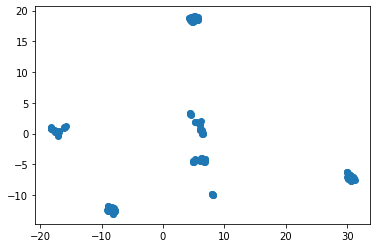

In [8]:
import matplotlib.pyplot as plt
import umap

# reducer = umap.UMAP(n_components=2, metric='cosine')
reducer = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=15)
reducer.fit(mts_train.features, y=mts_train.y)
coords_train = reducer.transform(mts_train.features)
coords_test = reducer.transform(mts_test.features)

plt.scatter(coords_train[:, 0], coords_train[:, 1])


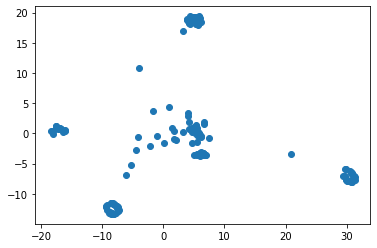

In [9]:
plt.scatter(coords_test[:, 0], coords_test[:, 1])

In [10]:
import sys
sys.path.append('/home/texs/Documentos/Repositories/mts_viz')
from server.source.storage import MTSStorage

In [11]:
storage = MTSStorage('mts_comparison')    
# storage.delete()
storage.load()

# classLabels = {int(v): str(v) for v in np.unique(y)}
dimensions = [str(dim) for dim in range(mts_train.D)]
# dimensions = [sPoll, sPoll + '_norm']
# dimensions = pollutants + [poll + '_norm' for poll in pollutants]
data = np.concatenate([mts_train.X_orig, mts_train.X], axis=2) 
storage.add_mts(
    '{}_peax_train'.format(dataset),
    data, 
    dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
    labels = {'class': mts_train.y},
    labelsNames = {'class': classLabels},
    coords = {
        'shape': coords_train,
    },
    sampling=True,
    n_samples= 400
)

data = np.concatenate([mts_test.X_orig, mts_test.X], axis=2) 
storage.add_mts(
    '{}_peax_test'.format(dataset),
    data, 
    dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
    labels = {'class': mts_test.y},
    labelsNames = {'class': classLabels},
    coords = {
        'shape': coords_test,
    },
    sampling=True,
    n_samples= 400
)


storage.save()

mts shape: N: 180 -  T: 51 - D: 48
mts shape: N: 180 -  T: 51 - D: 48
